In [6]:
from keras.models import Model,Sequential
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.layers import Input,Dense,Lambda,Flatten
import numpy as np 
from glob import glob 


In [25]:
import matplotlib.pyplot as plt

In [7]:
Image_Size=[224,224]

In [11]:
train_path=r'C:\Users\My PC\Desktop\Machine Learning\Kaggle\VGG16_datatest\train'
test_path=r'C:\Users\My PC\Desktop\Machine Learning\Kaggle\VGG16_datatest\test'

In [9]:
vgg=VGG16(input_shape=Image_Size +[3],weights='imagenet',include_top=False)

58892288/58889256 [==============================] - 193s 3us/step


In [12]:
for layer in vgg.layers:
    layer.trainable=False

In [14]:
folders=glob(r'C:\Users\My PC\Desktop\Machine Learning\Kaggle\VGG16_datatest\train\*')

In [15]:
x=Flatten()(vgg.output)

In [17]:
pred=Dense(len(folders),activation='softmax')(x)

In [18]:
model=Model(inputs=vgg.input,outputs=pred)

In [19]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [20]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [21]:
#data generation
train_gen=ImageDataGenerator(rescale=1./255,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True)
test_gen=ImageDataGenerator(rescale=1./255)
training_set=train_gen.flow_from_directory(train_path,
                                          target_size=(224,224),
                                          batch_size=32,
                                          class_mode='categorical')
test_set=test_gen.flow_from_directory(test_path,
                                          target_size=(224,224),
                                          batch_size=32,
                                          class_mode='categorical')


Found 8 images belonging to 2 classes.
Found 6 images belonging to 2 classes.


In [23]:
r=model.fit_generator(training_set,validation_data=test_set,
                     epochs=5,
                     steps_per_epoch=len(training_set),
                     validation_steps=len(test_set))

Epoch 1/5
1/1 [==============================] - 87s 87s/step - loss: 0.6029 - accuracy: 0.5000 - val_loss: 0.9115 - val_accuracy: 0.5000
Epoch 2/5
1/1 [==============================] - 80s 80s/step - loss: 1.1894 - accuracy: 0.5000 - val_loss: 0.4600 - val_accuracy: 0.6667
Epoch 3/5
1/1 [==============================] - 79s 79s/step - loss: 0.1030 - accuracy: 1.0000 - val_loss: 1.3036 - val_accuracy: 0.5000
Epoch 4/5
1/1 [==============================] - 74s 74s/step - loss: 0.3570 - accuracy: 0.7500 - val_loss: 1.2452 - val_accuracy: 0.5000
Epoch 5/5
1/1 [==============================] - 76s 76s/step - loss: 0.0524 - accuracy: 1.0000 - val_loss: 1.0392 - val_accuracy: 0.6667


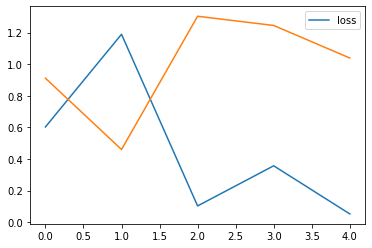

In [28]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'])
plt.legend()
plt.show()
